# Predicting US Covid Cases based on historical CDC reported flu data

In [80]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing

### getting historical flu data

In [81]:
flu_dir = "../../cdc-fludata/us_national/"

In [82]:
flu_dictionary = {}

for year in range(1997, 2019):
    filepath = "usflu_"
    year_string = str(year) + "-" + str(year + 1)
    filepath = flu_dir + filepath + year_string + ".csv"
    temp_df = pd.read_csv(filepath)
    flu_dictionary[year] = temp_df

### combining flu data into one chronological series of total cases

In [84]:
# getting total cases and putting them in a series by week
flu_series_dict = {} 

for year in flu_dictionary:
    temp_df = flu_dictionary[year]
    temp_df = temp_df.set_index("WEEK")
    abridged_df = temp_df.iloc[:, 2:]
    
    try:
        abridged_df = abridged_df.drop(columns="PERCENT POSITIVE")
    except:
        pass
    
    total_cases_series = abridged_df.sum(axis=1)
    flu_series_dict[year] = total_cases_series
    

In [85]:
all_cases_series = pd.Series(dtype="int64")

for year in flu_series_dict:
    temp_series = flu_series_dict[year]
    all_cases_series = all_cases_series.append(temp_series, ignore_index=True)

In [86]:
all_cases_series

0         0
1        11
2        17
3         7
4        10
       ... 
1143     87
1144    110
1145    143
1146    147
1147    152
Length: 1148, dtype: int64

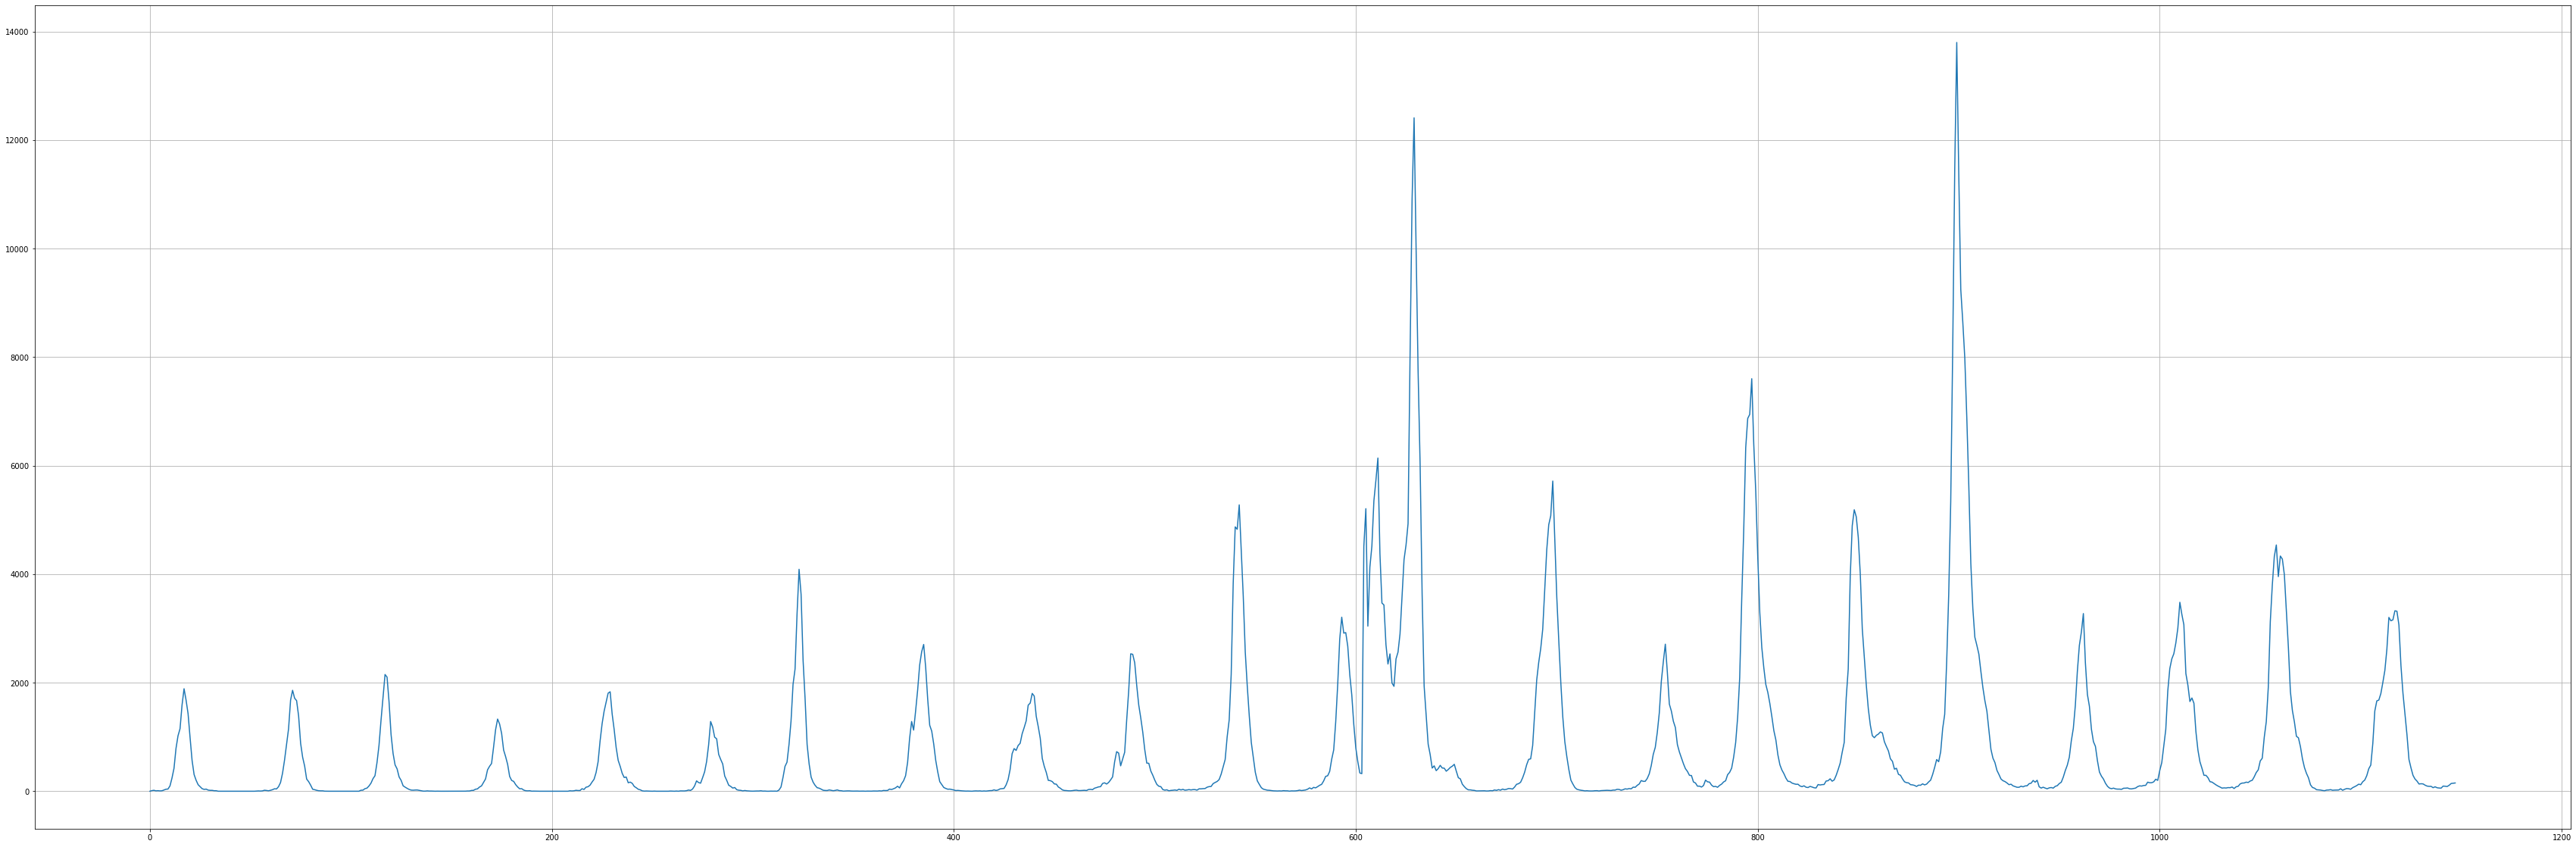

In [87]:
all_cases_series.plot(grid=True, figsize=(60,20))

### Now, making a normalized series between 0, 1

In [88]:
norm_flu_series_dict = {}

for year in flu_series_dict:
    temp_series = flu_series_dict[year]
    temp_list = preprocessing.minmax_scale(temp_series)
    temp_series = pd.Series(temp_list)
    norm_flu_series_dict[year] = temp_series

In [89]:
all_cases_norm_series = pd.Series(dtype="int64")

for year in norm_flu_series_dict:
    temp_series = norm_flu_series_dict[year]
    all_cases_norm_series = all_cases_norm_series.append(temp_series, ignore_index=True)

0       0.000000
1       0.005823
2       0.008999
3       0.003706
4       0.005294
          ...   
1143    0.009180
1144    0.016218
1145    0.026316
1146    0.027540
1147    0.029070
Length: 1148, dtype: float64

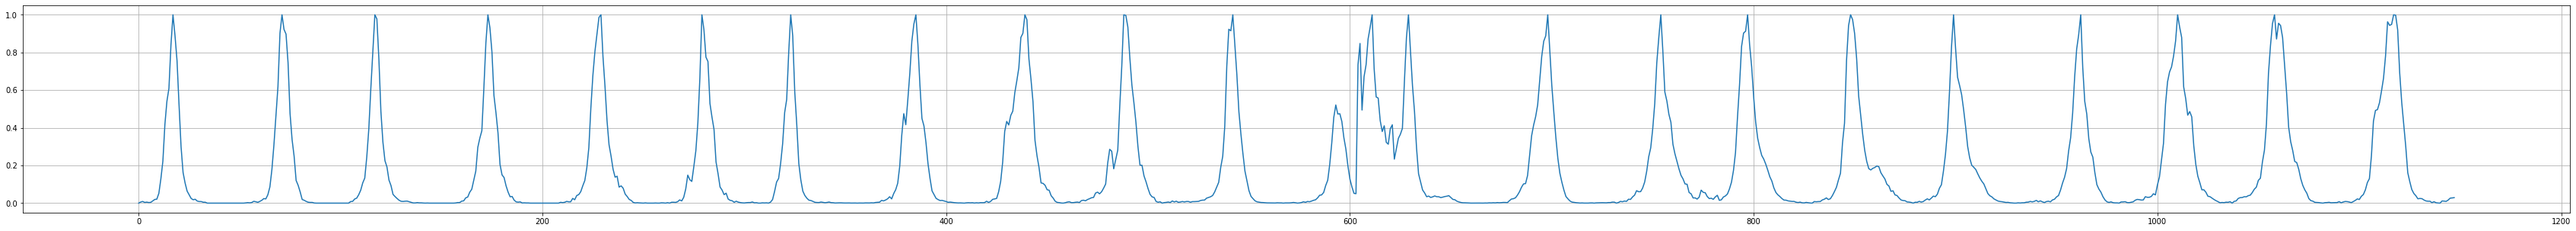

In [91]:
all_cases_norm_series.plot(grid=True, figsize=(60,5))
all_cases_norm_series

## Getting US COVID-19 Case Data

In [92]:
datapath = "../../COVID-19/csse_covid_19_data/csse_covid_19_time_series/"

# Choose from "US Cases", "US Deaths", "World Cases", "World Deaths", "World Recoveries"
key = "World Cases" 

if key == "US Cases":
    datapath = datapath + "time_series_covid19_confirmed_US.csv"
elif key == "US Deaths":
    datapath = datapath + "time_series_covid19_deaths_US.csv"
elif key == "World Cases":
    datapath = datapath + "time_series_covid19_confirmed_global.csv"
elif key == "World Deaths":
    datapath = datapath + "time_series_covid19_deaths_global.csv"
elif key == "World Recoveries":
    datapath = datapath + "time_series_covid19_recovered_global.csv"

In [93]:
covid_df = pd.read_csv(datapath)

In [94]:
covid_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,853,853,853,853,854,854,855,855,855,855
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,130,138,140,142,148,155,166,172,176,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,639,659,661,662,671,683,688,693,698,698
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,632,705,728,844,885,902,909,919,922,941
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,163,176,176,176,197,197,210,210,247,247
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,4902,4971,5035,5097,5160,5221,5279,5338,5399,5457


In [95]:
us_data = covid_df.loc[covid_df["Country/Region"] == "US"]

In [96]:
us_cases = us_data.iloc[:,4:]

In [97]:
us_cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20
225,1,1,2,2,5,5,5,5,5,7,...,2048986,2074526,2094058,2114026,2137731,2163290,2191052,2222579,2255119,2279879


In [98]:
us_cases = us_cases.squeeze()

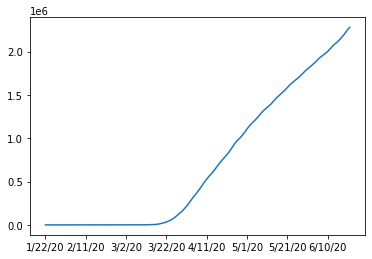

In [99]:
us_cases.plot()

### convert daily data to weekly data

In [100]:
us_weekly_cases = us_cases.iloc[::7]

In [101]:
us_weekly_cases

1/22/20          1
1/29/20          5
2/5/20          11
2/12/20         12
2/19/20         13
2/26/20         15
3/4/20         104
3/11/20       1109
3/18/20       8914
3/25/20      66044
4/1/20      214194
4/8/20      429686
4/15/20     637974
4/22/20     837414
4/29/20    1042926
5/6/20     1233527
5/13/20    1396109
5/20/20    1558949
5/27/20    1707423
6/3/20     1857248
6/10/20    2000702
6/17/20    2163290
Name: 225, dtype: int64

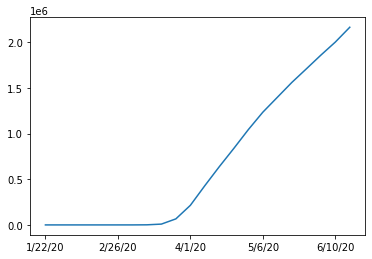

In [102]:
us_weekly_cases.plot()

### Converting cumulative series to non-cumulative series

In [103]:
us_wnew_cases = us_weekly_cases.diff()
us_wnew_cases[0] = 1.0
us_wnew_cases

1/22/20         1.0
1/29/20         4.0
2/5/20          6.0
2/12/20         1.0
2/19/20         1.0
2/26/20         2.0
3/4/20         89.0
3/11/20      1005.0
3/18/20      7805.0
3/25/20     57130.0
4/1/20     148150.0
4/8/20     215492.0
4/15/20    208288.0
4/22/20    199440.0
4/29/20    205512.0
5/6/20     190601.0
5/13/20    162582.0
5/20/20    162840.0
5/27/20    148474.0
6/3/20     149825.0
6/10/20    143454.0
6/17/20    162588.0
Name: 225, dtype: float64

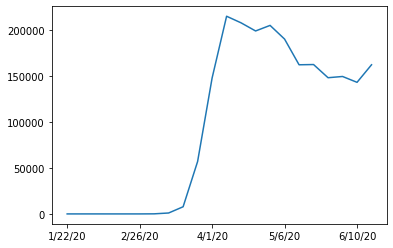

In [104]:
us_wnew_cases.plot()

### normalizing weekly case data

0     0.000000
1     0.000014
2     0.000023
3     0.000000
4     0.000000
5     0.000005
6     0.000408
7     0.004659
8     0.036215
9     0.265111
10    0.687495
11    1.000000
12    0.966569
13    0.925510
14    0.953687
15    0.884492
16    0.754468
17    0.755665
18    0.688999
19    0.695268
20    0.665703
21    0.754496
dtype: float64

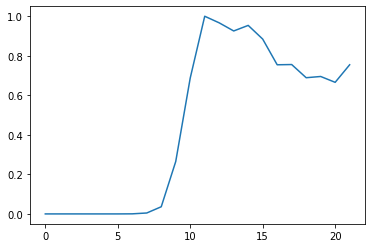

In [105]:
temp_list = sklearn.preprocessing.minmax_scale(us_wnew_cases)
us_wnew_cases_norm = pd.Series(temp_list)
us_wnew_cases_norm.plot()
us_wnew_cases_norm

## Building Neural Net Model

### Setting Testing & Training Data

In [115]:
# this code is directly from https://www.tensorflow.org/tutorials/structured_data/time_series

def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
    
  return np.array(data), np.array(labels)

In [116]:
flu_data_train = all_cases_norm_series.to_numpy().flatten()
covid_data_test = us_wnew_cases_norm.to_numpy().flatten()

In [117]:
# choose {covid_past_history} vals to use to predict {covid_future_target + 1} vals into the future
past_history = 4
future_target = 0

x_train_us, y_train_us = univariate_data(flu_data_train, 
                                         0, 
                                         None, 
                                         past_history, 
                                         future_target)

x_val_us, y_val_us = univariate_data(covid_data_test, 
                                     0, 
                                     None, 
                                     past_history, 
                                     future_target)
                                     

In [118]:
print(x_train_us.shape, y_train_us.shape)
print(x_train_us.shape[-2:])

(1144, 4, 1) (1144,)
(4, 1)


In [119]:
print(x_val_us.shape, y_val_us.shape)

(18, 4, 1) (18,)


Past history example:
 [[0.0083682]
 [0.009298 ]
 [0.0218503]
 [0.0264993]]
using this history to predict the val:  0.044630404463040445


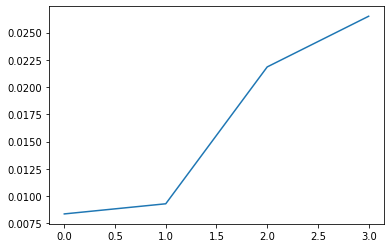

In [120]:
index = 105
print("Past history example:\n", x_train_us[index])
print("using this history to predict the val: ", y_train_us[index])
plt.plot(x_train_us[index])

### Designing Model Implementation

In [144]:
# much of below code is derived from https://www.tensorflow.org/tutorials/structured_data/time_series

BATCH_SIZE = 300
BUFFER_SIZE = 10000

train_us = tf.data.Dataset.from_tensor_slices((x_train_us, y_train_us))
train_us = train_us.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_us = tf.data.Dataset.from_tensor_slices((x_val_us, y_val_us))
val_us = val_us.batch(1).repeat()

In [145]:
# creating the neural network model

lstm_prediction_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=x_train_us.shape[-2:]),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
])

In [146]:
lstm_prediction_model.compile(optimizer='adam', loss='mae')

In [147]:
lstm_prediction_model.fit(train_us, epochs=10, steps_per_epoch=200, validation_data=val_us, validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 9s 43ms/step - loss: 0.0386 - val_loss: 0.0754
Epoch 2/10
200/200 [==============================] - 6s 28ms/step - loss: 0.0253 - val_loss: 0.0860
Epoch 3/10
200/200 [==============================] - 6s 28ms/step - loss: 0.0249 - val_loss: 0.0717
Epoch 4/10
200/200 [==============================] - 6s 29ms/step - loss: 0.0251 - val_loss: 0.0689
Epoch 5/10
200/200 [==============================] - 6s 30ms/step - loss: 0.0247 - val_loss: 0.0774
Epoch 6/10
200/200 [==============================] - 6s 30ms/step - loss: 0.0247 - val_loss: 0.0747
Epoch 7/10
200/200 [==============================] - 6s 31ms/step - loss: 0.0249 - val_loss: 0.0785
Epoch 8/10
200/200 [==============================] - 6s 30ms/step - loss: 0.0246 - val_loss: 0.0758
Epoch 9/10
200/200 [==============================] - 6s 31ms/step - loss: 0.0247 - val_loss: 0.0792
Epoch 10/10
200/200 [===========================

In [148]:
def create_time_steps(length):
  return list(range(-length, 0))

def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

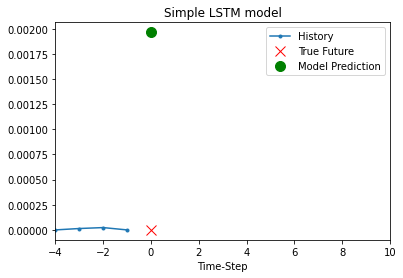

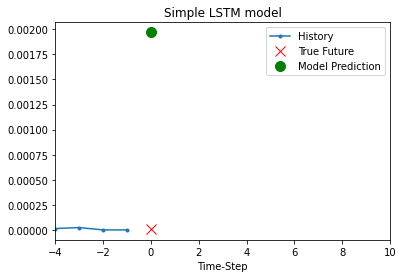

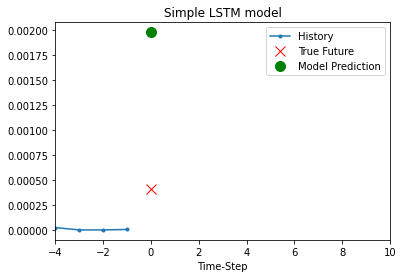

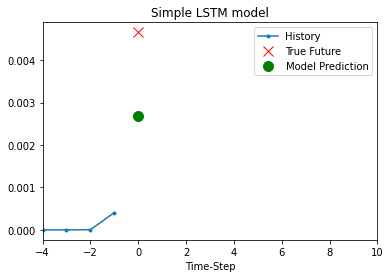

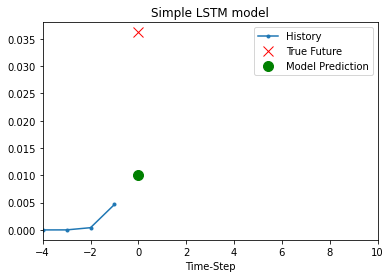

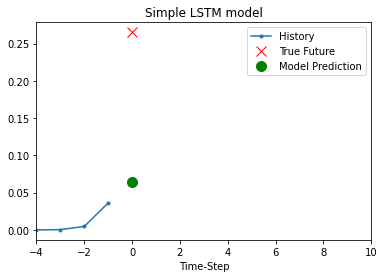

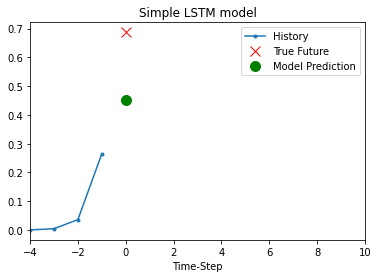

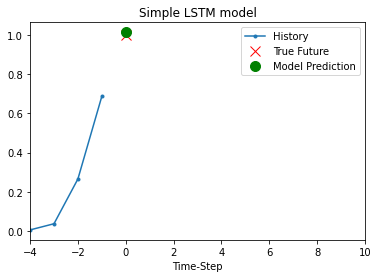

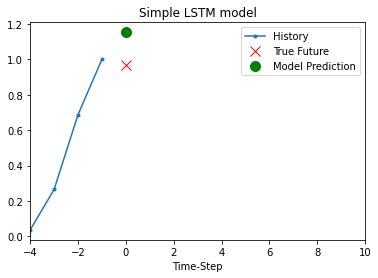

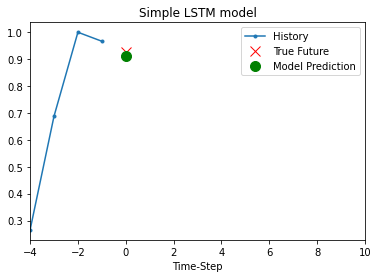

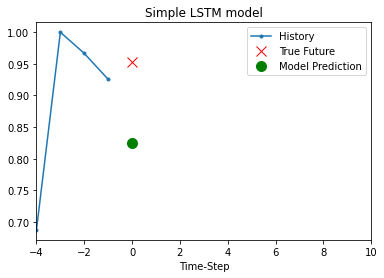

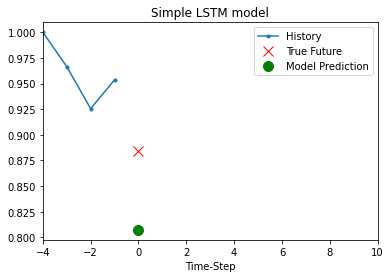

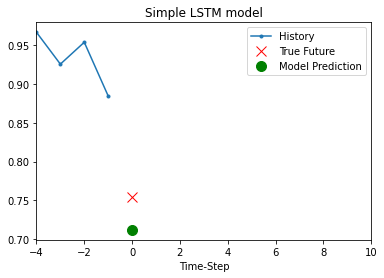

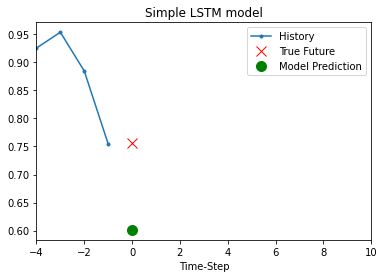

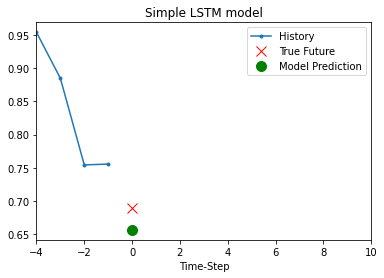

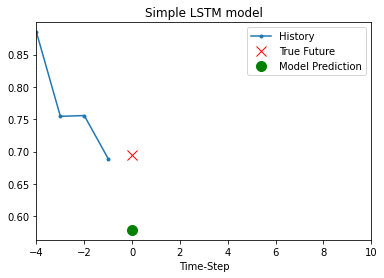

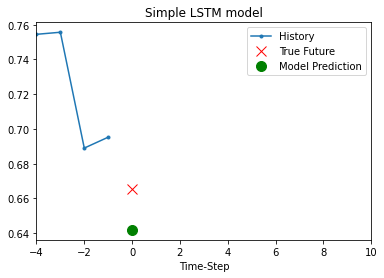

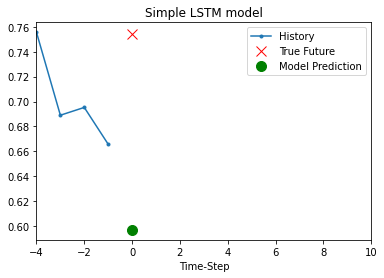

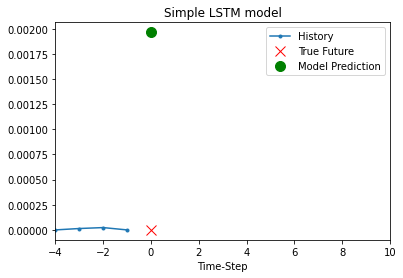

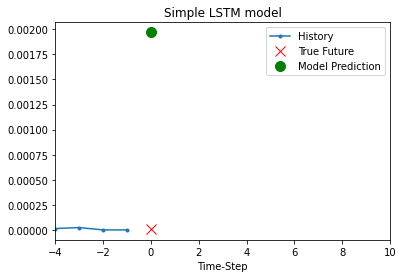

In [151]:
for x, y in val_us.take(20):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    lstm_prediction_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()